In [11]:
# Selenium에서 webdriver를 import한다.
from selenium import webdriver

In [14]:
#네이버에 접속
driver = webdriver.Chrome('chromedriver')
driver.get('https://naver.com')
driver.save_screenshot('selenium1.png')

True

크롬이 실행되면서 네이버 창이 뜨는데 다음 사진과 같이 'Chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다.'라는 문구를 볼 수 있다.

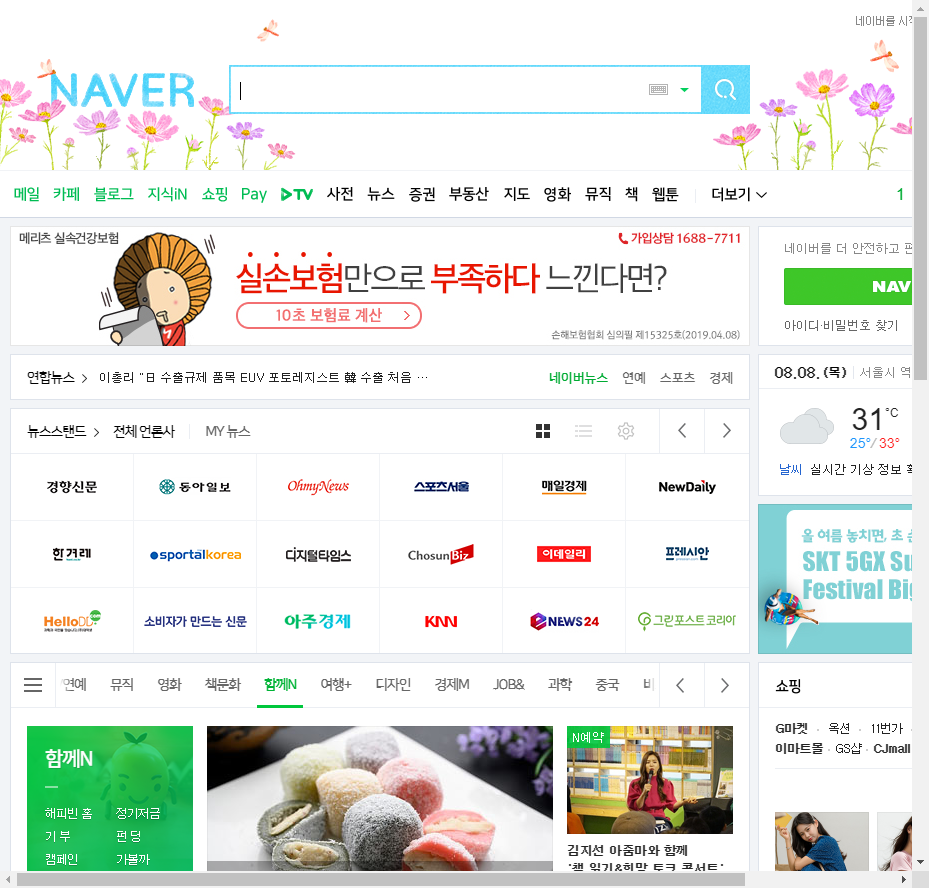

In [15]:
#!pip install pillow
from PIL import Image
Image.open('selenium1.png')

위와 같이 크롬 드라이버에 의해 생성된 브라우저는 손으로 조작해서는 안된다. 코드를 작성할 때 혼선이 생길 수 있기 때문이다. 그래도 XPath를 확보한다든지, 태그를 확인한다든지 등의 이유로 크롬 개발자 도구를 실행해야 할 수 있다. 그럴 때는 별도로 인터넷 창을 실행해서 작업하길 바란다.

In [ ]:
# Selenium은 화면을 캡쳐할 수 있다.
driver.save_screenshot('001.jpg')

In [16]:
xpath='''//*[@id="account"]/div/a/i'''
driver.find_element_by_xpath(xpath).click()

In [ ]:
Image.open('selenium2.png')

네이버 로그인 정보를 입력하는 곳이 있다. 크롬 드라이버로 네이버에 로그인하고 싶다면 당연히 ID와 비밀번호를 입력해야 한다. 위 그림을 보면 ID를 입력하는 부분과 비밀번호를 입력하는 부분의 html 소스 코드를 확인해보면 id= 이라는 항목에 id 혹은 pw라고 되어 있다. Selenium이 제공하는 명령 중 find_element_by_id를 이용해서 id와 pw를 찾으면 된다. 이미 그 전에 어떤 글자가 입력되어 있을 수 있기 때문에 clear() 명령으로 해당 id가 위치한 입력창의 내용을 지우고 send_keys 명령으로 자신의 ID와 비밀번호를 입력하면 된다.

In [17]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys('여기에 아이디를 적어주세요')

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys('여기에 암호를 적어주세요')

In [18]:
# 태그 오른쪽 클릭->Copy->xpath 밑에 붙여넣기
# find_element_by_xpath(xpath) : xpath 위치 찾기
# click() : 로그인 버튼 클릭
xpath = '''//*[@id="frmNIDLogin"]/fieldset/input'''
driver.find_element_by_xpath(xpath).click()

In [19]:
# 메일에 접근(주소변경)
driver.get('http://mail.naver.com')

In [ ]:
# BeautifulSoup를 이용해서 페이지 내용 읽어오기
from bs4 import BeautifulSoup

html = driver.page_source # 현재 Selenium이 접근한 페이지 소스를 넘겨 받는다. 
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# 메일을 보낸 사람이 나타나는 곳의 태그 확인
Image.open('selenium3.png')

In [ ]:
raw_list = soup.find_all('div', 'name _ccr(lst.from)')
raw_list

In [ ]:
# 보낸 사람들의 리스트 확보
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

In [ ]:
# 실행된 크롬 드라이버 종료
driver.close()

In [ ]:
# Selenium에서 webdriver를 import한다.
from selenium import webdriver

https://goo.gl/VH1A5t 에 접속해서 서울시 구별 주유소 정보를 받아오자. 지역은 서울시 정보로 한정한다.

In [ ]:
driver = webdriver.Chrome('chromedriver')
driver.get('http://www.naver.com')

In [ ]:
driver.get('http://www.opinet.co.kr')
driver.save_screenshot('selenium4.jpg')

In [ ]:
Image.open('selenium4.png')

In [ ]:
# 종로구라는 글자가 보이는 리스트 박스의 XPath를 이용하여 element를 찾고 gu_list_raw 변수에 저장한다.
gu_list_raw = driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''')

In [ ]:
Image.open('selenium5.png')

In [ ]:
# 구 리스트는 find_elements_by_tag_name으로 option이라는 태그를 찾으면 된다.
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [ ]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

In [ ]:
#gu_names에서 첫번째 것을 한번 시험 삼아 입력해보자.
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [ ]:
Image.open('selenium6.png')

In [ ]:
#조회버튼의 Xpath를 찾아서 클릭
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [ ]:
Image.open('selenium7.png')

In [ ]:
#엑셀 저장 버튼을 눌러서 엑셀 내용으로 저장하자.
xpath = '''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [ ]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath ='''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = '''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

In [ ]:
Image.open('selenium8.png')

In [ ]:
# 드라이버를 닫고, 이제 저장된 엑셀 파일로 셀프 주유소가 실제로 저렴한지 여부를 확인해 보자.
driver.close()

 25개의 엑셀 파일을 data 폴더로 이동한 후 파이썬의 glob 모듈을 사용하면 손쉽게 열 수 있다.

In [ ]:
import pandas as pd
from glob import glob

In [ ]:
# 지역*.xls는 지역으로 시작하면서 확장자가 xls인 파일들
glob('pydata/selenium/지역*.xls')

In [ ]:
# station_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장
stations_files = glob('pydata/selenium/지역*.xls')
stations_files

In [ ]:
# concat 명령으로 합쳐본다.
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [ ]:
station_raw.info()

In [ ]:
station_raw.head()

In [ ]:
# 원하는 컬럼만 가지고 오고 이름도 다시 정의해서 stations 변수에 저장
# 이 단원에서는 휘발유만 다루겠다.
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                         '주소': station_raw['주소'],
                         '가격': station_raw['휘발유'],
                         '셀프': station_raw['셀프여부'],
                         '상표': station_raw['상표']
                        })
stations.head()

In [ ]:
# 추가로 주소에서 구 이름만 추출하자.
# 빈칸을 기준으로 분리 후 2번째 단어 선택
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

In [ ]:
# head만 보기에는 문제 없으나 500여개의 데이터가 어떤 상태인지 확인하기 쉽지 않다.
# unique() 검사 수행
stations['구'].unique()

In [ ]:
# stations[stations['구']=='서울특별시']

In [ ]:
# stations.loc[stations['구']=='서울특별시','구']='성동구'
# stations['구'].unique()

In [ ]:
# stations[stations['구']=='특별시']

In [ ]:
# stations.loc[stations['구']=='특별시','구'] = '도봉구'
# stations['구'].unique()

In [ ]:
# 가격 컬럼의 unique를 구해보자.
stations['가격'].unique()

In [ ]:
# 숫자가 아닌 '-' 문자가 끼어있다.
stations[stations['가격']=='-']

In [ ]:
# '-' 문자가 포함된 데이터 제외시켜 버리기
stations = stations[stations['가격'] != '-']
stations.head()

In [ ]:
# 가격을 float 형으로 변환한다.
stations['가격'] = [float(value) for value in stations['가격']]

In [ ]:
# 25개의 엑셀을 합쳤기 때문에 index가 중복될 수 있다.
# reset_index 명령으로 인덱스를 처음부터 다시 기록하자.
# index라는 컬럼이 하나 더 생기는데 그 부분을 제거한다.
stations.reset_index(inplace=True)
del stations['index']

In [ ]:
stations.info()

# 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [ ]:
!pip install seaborn

In [ ]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

In [ ]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

boxplot으로 간편하게 셀프 컬럼을 기준으로 가격 분포를 확인할 수 있게 되었다. 코드의 결과를 보면 직사각형이 데이터의 대다수가 몰려 있는 곳이라는 것은 직관적으로 알 수 있다. 전반적으로 셀프 주유소인 경유가 가격이 낮게 되어 있다.

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

현대 오일뱅크, GS칼텍스, S-Oil, SK에너지 모두 셀프 주유소가 저렴하다. SK에너지는 그 중 가격대가 가장 높게 형성되어 있는 것을 알 수 있다.

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

Swarmplot을 같이 그려보면 좀 더 확실히 데이터의 분포를 볼 수 있다. 셀프 주유소 말고 상표별 데이터를 확인했는데 SK에너지가 높은 가격대를 형성하는 주유소가 많았다. 전반적으로는 현대 오일뱅크가 4대 주유 브랜드 중에서는 저렴하다는 것을 확인할 수 있다.

이렇게 해서 셀프 주유소는 대체로 저렴하다고 이야기 할 수 있다. 여기서 한 단계 더 나아가서 서울시 구별 주유 가격, 서울에서 높은 가격의 주유소나 낮은 가격의 주유소에 대해서도 확인해보자.

# 서울시 구별 주유 가격 확인하기

In [ ]:
# 지도를 그리기 위한 모듈 import
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [ ]:
# 이제 서울시에서 가장 주유 가격이 비싼 주유소를 보겠다.
stations.sort_values(by='가격', ascending=False).head(10)

In [ ]:
# 서울시에서 가장 주유 가격이 싼 주유소
stations.sort_values(by='가격', ascending=True).head(10)

강북구, 은평구, 강서구가 보이는데 이런 개별 데이터만 가지고 구별 정보를 이야기하기는 어렵다.

In [ ]:
# pivot_table을 이용해서 구별 가격 정보로 변경하고 가격은 평균값으로 정리하자.
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],
                        aggfunc=np.mean)
gu_data.head()

In [ ]:
# pivot_table을 이용해서 구별 가격 정보로 변경하고 가격은 평균값으로 정리하자.
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'],
                        aggfunc=np.mean)
gu_data.head()

In [ ]:
# 서울시 구별 정보에 대해 지도로 표현하자. 평균적으로 
geo_path = 'pydata/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

평균적으로 중구, 용산구, 종로구, 마포구, 강남구가 주유가격이 아주 높아 보인다.

# 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [ ]:
# 주유 가격 상위 10개 주소를 oil_price_top10 이름으로 저장한다.
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

In [ ]:
# 역시 하위 10개에 대해서도 oil_price_bottom10에 저장한다.
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

In [ ]:
# google maps API용 key 입력
gmap_key = '여기에 구글 API 키를 넣어주세요'
gmaps = googlemaps.Client(key=gmap_key)

In [ ]:
# 주유 가격 상위 10개 주유소에 대해 위도, 경도 정보를 읽어오자.
# 구글 맵에서 검색할 수 없다든지 하는 문제로 에러가 나는 것에 대비해 try-except
# try 구문을 실행하다가 에러나면 except 구문에서 지정된 nan값을 저장

from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')
        
oil_price_top10['lat']=lat
oil_price_top10['lng']=lng
oil_price_top10

In [ ]:
# 동일한 방법으로 주유 가격 하위 10개 주유소에 대해 위도, 경도 정보를 읽어오자.
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan !')
        
oil_price_bottom10['lat']=lat
oil_price_bottom10['lng']=lng
oil_price_bottom10

In [ ]:
# 위에서 혹시 nan값으로 처리된 부분이 있다면 ,
# notmul 명령을 이용해서 NaN이 아닐때만 지도에 표기하도록 한다.
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                            radius=15, color='#CD3181',
                            fill_color='#CD3181').add_to(map)
        
    for n in oil_price_bottom10.index:
        if pd.notnull(oil_price_bottom10['lat'][n]):
            folium.CircleMarker([oil_price_bottom10['lat'][n],
                                 oil_price_bottom10['lng'][n]],
                                radius=15, color='#3186cc',
                                fill_color='#3186cc').add_to(map)
map

결과를 보면 '중구', '종로구'와 같은 서울 중심에 비싼 주유소가 몰려있고, '강북', '은평', '양천'과 같은 서울 바깥방향에 저렴한 주유소가 몰려 있다는 것을 알 수 있다.기름이 부족하다면 서울 안쪽으로 들어가기 전에 미리 넣고 가는 것이 좋다는 것을 알 수 있다.